In [1]:
#Analisis de transectas


import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


path=r'/Users/claudia/Documents/CoastSat-master/data/MogotesTodo2010a2020'

In [2]:
df=pd.read_csv(path+r'/transect_time_series_tidally_corrected.csv',header=0,names=['dates','t1','t2','t3','t4','t5'])

df.head()

,dates,t1,t2,t3,t4,t5
0,2014-03-08 13:33:38+00:00,206.651612,229.613750,269.340123,216.407419,116.326108
1,2014-11-26 13:39:26+00:00,189.698313,207.000106,268.082698,219.649400,99.235172
2,2014-12-28 13:39:18+00:00,200.199540,214.929588,266.878473,224.146706,99.958795
3,2015-01-06 13:33:07+00:00,183.303549,206.383335,264.216027,220.806282,98.906971
4,2015-01-06 13:33:31+00:00,185.126291,207.480802,264.755140,221.735768,99.922585


In [14]:
t=['t1';'t2','t3','t4,','t5']
dates = df['dates']
df.index = pd.to_datetime(dates)
for i in range (1,5):
    t[i]=df['t'+str(i)] - np.nanmedian(df['t'+str(i)])
    df['t_corregida'+str(i)]=t[i]

df.index
print(t)

['t1', dates
2014-03-08 13:33:38+00:00    -0.025185
2014-11-26 13:39:26+00:00   -16.978483
2014-12-28 13:39:18+00:00    -6.477257
2015-01-06 13:33:07+00:00   -23.373248
2015-01-06 13:33:31+00:00   -21.550506
2015-05-30 13:32:09+00:00   -20.685559
2015-07-01 13:32:51+00:00   -10.933415
2015-11-22 13:33:13+00:00    -6.248836
2015-11-22 13:33:37+00:00    -6.368253
2015-12-24 13:33:12+00:00   -26.033447
2015-12-24 13:33:36+00:00   -26.891945
2016-02-10 13:33:27+00:00   -12.052565
2016-06-25 13:52:58+00:00    10.333233
2016-07-05 13:44:12+00:00    19.864206
2016-08-24 13:52:59+00:00     5.228971
2016-09-21 13:33:18+00:00   -31.902011
2016-09-21 13:33:42+00:00   -31.777621
2016-10-30 13:39:36+00:00   -56.088609
2016-12-10 13:33:22+00:00   -33.157632
2016-12-12 13:45:46+00:00    -8.319512
2017-01-11 13:33:14+00:00   -41.471308
2017-01-11 13:33:38+00:00   -40.883734
2017-01-27 13:33:09+00:00   -41.272721
2017-01-27 13:33:33+00:00   -39.852947
2017-02-03 13:39:16+00:00   -20.867571
2017-02-20 1

No handles with labels found to put in legend.


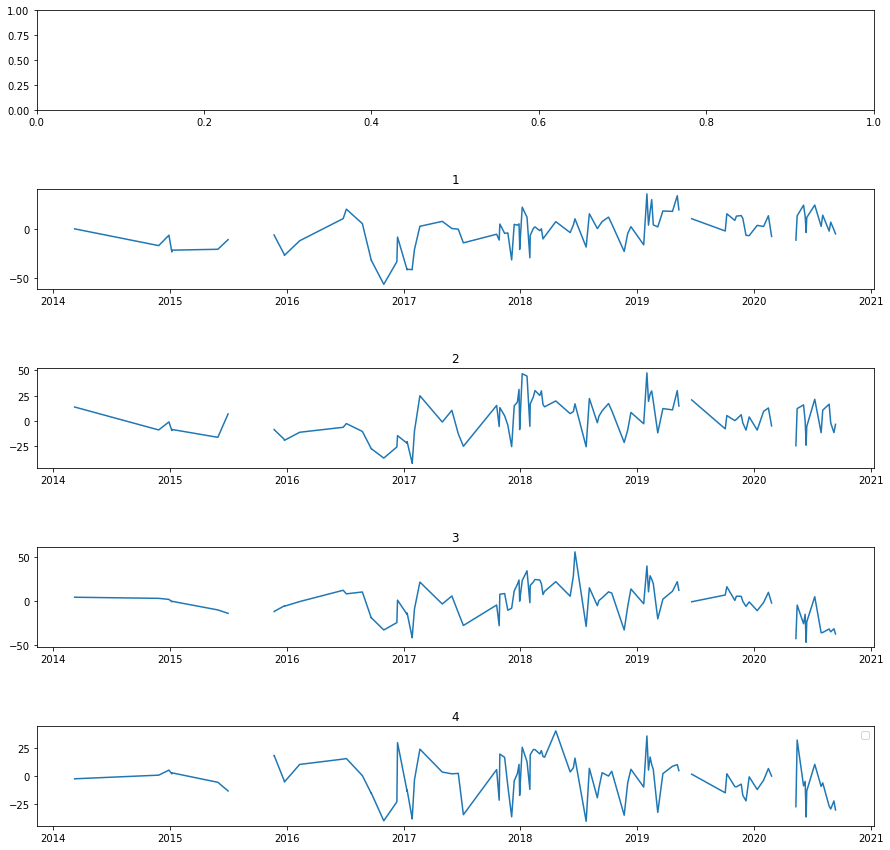

In [6]:
#fig = plt.figure(figsize=(10,6))
#ax = plt.axes()
#df['t5-corregida'].plot(ax=ax)
#ax.set(xlabel="tiempo", ylabel="nivel [m]")
#ax.grid(color='grey',linestyle=':')
#label='t'+str(i)
fig, axs = plt.subplots(5,1, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8)
#axs = axs.ravel()
for i in range (1,5):
    axs[i].plot(t[i])
    axs[i].set_title(str(i))
#axs.set(xlabel="tiempo", ylabel="nivel [m]")
#axs.grid(color='grey',linestyle=':')
plt.legend()

#me plotea del 1 al 4 y a partir del segundo plot

In [11]:
df = df.dropna(how='any')

X = df.index - df.index[0]
print(X)

TimedeltaIndex([   '0 days 00:00:00',  '263 days 00:05:48',
                 '295 days 00:05:40',  '303 days 23:59:29',
                 '303 days 23:59:53',  '447 days 23:58:31',
                 '479 days 23:59:13',  '623 days 23:59:35',
                 '623 days 23:59:59',  '655 days 23:59:34',
                ...
                '2287 days 23:59:03', '2287 days 23:59:27',
                '2290 days 00:19:41', '2315 days 00:19:37',
                '2335 days 00:19:38', '2340 days 00:19:41',
                '2360 days 00:19:40', '2365 days 00:19:38',
                '2375 days 00:19:38', '2380 days 00:19:39'],
               dtype='timedelta64[ns]', name='dates', length=102, freq=None)


In [15]:
#regresion lineal

Xdays = np.asarray(X.days.tolist()).reshape(-1,1)
y = df['t_corregida5'].values

regr = linear_model.LinearRegression()
regr.fit(Xdays, y)

# Make predictions using the testing set
y_pred = regr.predict(Xdays)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

# no me toma esta forma de escribir las cosas: 't_corregida5'

KeyError: 't_corregida5'

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes()
df['t5-corregida'].plot(ax=ax, linewidth=0.75)
ax.set(xlabel="tiempo", ylabel="nivel [m]")
ax.grid(color='grey', linestyle=':')
ax.plot(df.index, y_pred, color='black', linewidth=2, linestyle='--')
fig.savefig(path + '/regresion_transecta5.png')